# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [3]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [4]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [5]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

**Respuestas:**

1. **Número de atributos:** Hay 10 atributos/características en los datos. Representan medidas fisiológicas y demográficas como edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones de suero sanguíneo.

2. **Relación entre data y target:** `diabetes['data']` contiene las 10 características/variables predictoras (variables X), mientras que `diabetes['target']` contiene la variable objetivo/respuesta (variable y) que es una medida cuantitativa del progreso de la enfermedad de diabetes un año después del baseline.

3. **Número de registros:** Hay 442 registros/muestras en el dataset.

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [6]:
print("Dimensiones de diabetes['data']:", diabetes['data'].shape)
print("Dimensiones de diabetes['target']:", diabetes['target'].shape)

Dimensiones de diabetes['data']: (442, 10)
Dimensiones de diabetes['target']: (442,)


## Building a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [7]:
from sklearn.linear_model import LinearRegression

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [8]:
diabetes_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [10]:
# Dividir los datos en entrenamiento y prueba
# Los últimos 20 registros para test, el resto para entrenamiento
diabetes_data_train = diabetes['data'][:-20]
diabetes_target_train = diabetes['target'][:-20]
diabetes_data_test = diabetes['data'][-20:]
diabetes_target_test = diabetes['target'][-20:]

print(f"Datos de entrenamiento: {diabetes_data_train.shape}")
print(f"Target de entrenamiento: {diabetes_target_train.shape}")
print(f"Datos de test: {diabetes_data_test.shape}")
print(f"Target de test: {diabetes_target_test.shape}")

Datos de entrenamiento: (422, 10)
Target de entrenamiento: (422,)
Datos de test: (20, 10)
Target de test: (20,)


Perform a brief exploratory analysis to investigate the conditions necessary for linear regression. This analysis will help you understand the distribution of the target variable and its correlations with other features.

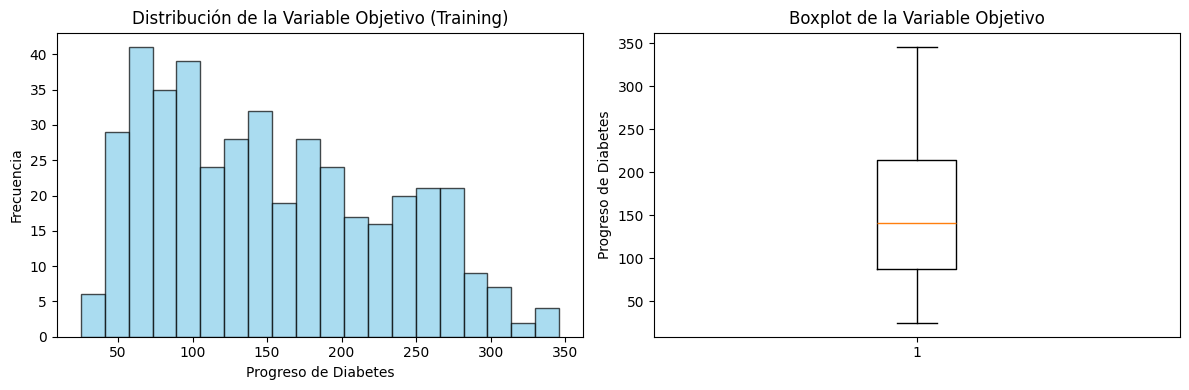

Estadísticas descriptivas de la variable objetivo:
Media: 153.36
Desviación estándar: 77.13
Mínimo: 25.00
Máximo: 346.00


In [11]:
# Análisis exploratorio básico
# 1. Distribución de la variable objetivo
plt.figure(figsize=(12, 4))

# Selecciona el primer subplot (1 fila, 2 columnas, posición 1)
plt.subplot(1, 2, 1)
# Dibuja un histograma de la variable objetivo de entrenamiento
plt.hist(diabetes_target_train, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
# Esta gráfica muestra cómo se distribuyen los valores del progreso de la diabetes en el conjunto de entrenamiento
# Nos sirve para entender si la variable objetivo tiene una distribución normal, sesgada, etc.
plt.title('Distribución de la Variable Objetivo (Training)')
plt.xlabel('Progreso de Diabetes')
plt.ylabel('Frecuencia')

# 2. Estadísticas descriptivas
# Esta parte muestra un boxplot para visualizar la dispersión y posibles outliers en la variable objetivo
# Nos sirve para entender la variabilidad de los datos y detectar valores atípicos
plt.subplot(1, 2, 2)
plt.boxplot(diabetes_target_train)
plt.title('Boxplot de la Variable Objetivo')
plt.ylabel('Progreso de Diabetes')

plt.tight_layout()
plt.show()

print("Estadísticas descriptivas de la variable objetivo:")
print(f"Media: {diabetes_target_train.mean():.2f}")
print(f"Desviación estándar: {diabetes_target_train.std():.2f}")
print(f"Mínimo: {diabetes_target_train.min():.2f}")
print(f"Máximo: {diabetes_target_train.max():.2f}")

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [12]:
# Entrenar el modelo con los datos de entrenamiento
diabetes_model.fit(diabetes_data_train, diabetes_target_train)

# Mostrar intercepto y coeficientes
# El intercepto es el valor predicho cuando todas las características son cero
# Los coeficientes indican cuánto cambia la variable objetivo (progreso de la diabetes) por cada cambio unitario en una característica, manteniendo las demás constantes.
# Es decir, cada coeficiente representa la influencia de una variable independiente sobre la variable dependiente en el modelo lineal.
print("Intercepto del modelo:", diabetes_model.intercept_)
print("Coeficientes del modelo:", diabetes_model.coef_)
print(f"Número de coeficientes: {len(diabetes_model.coef_)}")

Intercepto del modelo: 152.76429169049118
Coeficientes del modelo: [ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]
Número de coeficientes: 10


#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [13]:
# Hacer predicciones sobre los datos de test
diabetes_predictions = diabetes_model.predict(diabetes_data_test)

print("Predicciones del modelo:")
print(diabetes_predictions)
print(f"\nNúmero de predicciones: {len(diabetes_predictions)}")

Predicciones del modelo:
[197.61898486 155.44031962 172.88875144 111.53270645 164.79397301
 131.06765869 259.12441219 100.47873746 117.06005372 124.30261597
 218.36868146  61.19581944 132.24837933 120.33293546  52.54513009
 194.03746764 102.5756431  123.56778709 211.03465323  52.60221696]

Número de predicciones: 20


y = a + b*x1 + c*x2 + d*x3 + ....

#### Print your `diabetes_target_test` and compare with the prediction. 

Valores reales de test:
[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]

Predicciones del modelo:
[197.61898486 155.44031962 172.88875144 111.53270645 164.79397301
 131.06765869 259.12441219 100.47873746 117.06005372 124.30261597
 218.36868146  61.19581944 132.24837933 120.33293546  52.54513009
 194.03746764 102.5756431  123.56778709 211.03465323  52.60221696]

Comparación lado a lado:
Real: 233.00, Predicción: 197.62, Diferencia: 35.38
Real: 91.00, Predicción: 155.44, Diferencia: 64.44
Real: 111.00, Predicción: 172.89, Diferencia: 61.89
Real: 152.00, Predicción: 111.53, Diferencia: 40.47
Real: 120.00, Predicción: 164.79, Diferencia: 44.79
Real: 67.00, Predicción: 131.07, Diferencia: 64.07
Real: 310.00, Predicción: 259.12, Diferencia: 50.88
Real: 94.00, Predicción: 100.48, Diferencia: 6.48
Real: 183.00, Predicción: 117.06, Diferencia: 65.94
Real: 66.00, Predicción: 124.30, Diferencia: 58.30
Real: 173.00, Predicción: 218.37, Diferen

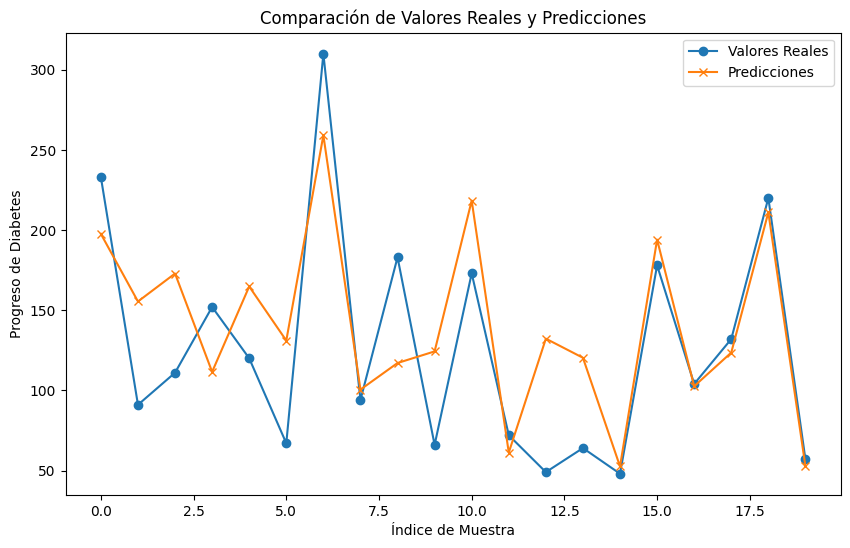

In [15]:
# Comparar predicciones vs valores reales
print("Valores reales de test:")
print(diabetes_target_test)
print("\nPredicciones del modelo:")
print(diabetes_predictions)
print("\nComparación lado a lado:")
for i in range(len(diabetes_target_test)):
    print(f"Real: {diabetes_target_test[i]:.2f}, Predicción: {diabetes_predictions[i]:.2f}, Diferencia: {abs(diabetes_target_test[i] - diabetes_predictions[i]):.2f}")

# Graficar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.plot(diabetes_target_test, label='Valores Reales', marker='o')
plt.plot(diabetes_predictions, label='Predicciones', marker='x')
plt.title('Comparación de Valores Reales y Predicciones')
plt.xlabel('Índice de Muestra')
plt.ylabel('Progreso de Diabetes')
plt.legend()
plt.show()

#### Is `diabetes_target_test` exactly the same as the model prediction? Use different error metrics

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

=== MÉTRICAS DE EVALUACIÓN DEL MODELO ===
Error Absoluto Medio (MAE): 36.61
Error Cuadrático Medio (MSE): 2004.52
Raíz del Error Cuadrático Medio (RMSE): 44.77
Error Porcentual Absoluto Medio (MAPE): 0.39
Coeficiente de Determinación (R²): 0.585


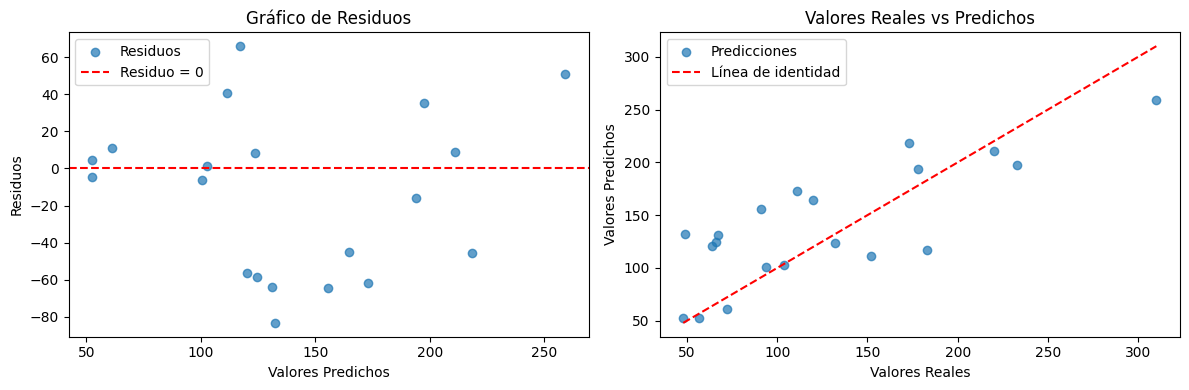

In [ ]:
# Calcular diferentes métricas de error
# MAE: Error Absoluto Medio - Promedio de las diferencias absolutas entre los valores reales y las predicciones
# MSE: Error Cuadrático Medio - Promedio de las diferencias al cuadrado entre los valores reales y las predicciones
# RMSE: Raíz del Error Cuadrático Medio - Raíz cuadrada del MSE, proporciona una medida de error en las mismas unidades que la variable objetivo
# MAPE: Error Porcentual Absoluto Medio - Promedio de las diferencias porcentuales absolutas entre los valores reales y las predicciones
# R²: Coeficiente de Determinación - Proporción de la varianza en la variable dependiente que es predecible a partir de la variable independiente
mae = mean_absolute_error(diabetes_target_test, diabetes_predictions)
mse = mean_squared_error(diabetes_target_test, diabetes_predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(diabetes_target_test, diabetes_predictions)
r2 = r2_score(diabetes_target_test, diabetes_predictions)

print("=== MÉTRICAS DE EVALUACIÓN DEL MODELO ===")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Error Porcentual Absoluto Medio (MAPE): {mape:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.3f}")

# Análisis de residuos
# Los residuos son las diferencias entre los valores reales y las predicciones del modelo
# Utilidad: Evaluar la calidad del modelo, detectar patrones no capturados por el modelo, identificar posibles outliers o errores en los datos
residuos = diabetes_target_test - diabetes_predictions

plt.figure(figsize=(12, 4))

# Grafico de residuos: un gráfico de dispersión de los residuos frente a los valores predichos
# El gráfico de residuos muestra en el eje X los valores predichos por el modelo y en el eje Y los residuos (diferencia entre el valor real y el predicho).
# Si el modelo es adecuado, los residuos deberían distribuirse aleatoriamente alrededor de 0, sin mostrar patrones claros.
# Si observamos un patrón (por ejemplo, forma de U o tendencia), puede indicar que el modelo no está capturando bien la relación entre variables.
# También ayuda a identificar posibles outliers o heterocedasticidad (varianza no constante de los residuos).
plt.subplot(1, 2, 1)
plt.scatter(diabetes_predictions, residuos, alpha=0.7, label='Residuos')
plt.axhline(y=0, color='red', linestyle='--', label='Residuo = 0')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.legend()

# Gráfico de valores reales vs predichos: un gráfico de dispersión de los valores reales frente a los valores predichos
# Este gráfico muestra cómo se comparan los valores predichos por el modelo con los valores reales.
# Si el modelo es perfecto, todos los puntos deberían alinearse a lo largo de la línea de identidad (línea roja discontinua).
# La dispersión de los puntos alrededor de esta línea indica la precisión del modelo: cuanto más cerca estén los puntos de la línea, mejor será el ajuste del modelo.
plt.subplot(1, 2, 2)
plt.scatter(diabetes_target_test, diabetes_predictions, alpha=0.7, label='Predicciones')
plt.plot([diabetes_target_test.min(), diabetes_target_test.max()], 
         [diabetes_target_test.min(), diabetes_target_test.max()], 'red', linestyle='--', label='Línea de identidad')
         # Línea de identidad (y=x): indica dónde estarían los puntos si las predicciones fueran perfectas
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos')
plt.legend()

plt.tight_layout()
plt.show()

#### Iterate with a new model to assess if any improvements can be made compared to the previous one. Consider reducing the number of variables or using `StandardScaler` to enhance model performance.

=== COMPARACIÓN DE MODELOS ===

MODELO ORIGINAL:
MAE: 36.61
MSE: 2004.52
RMSE: 44.77
R²: 0.585

MODELO MEJORADO (con StandardScaler):
MAE: 36.61
MSE: 2004.52
RMSE: 44.77
R²: 0.585

Mejora en RMSE: 0.00
Mejora en R²: 0.000


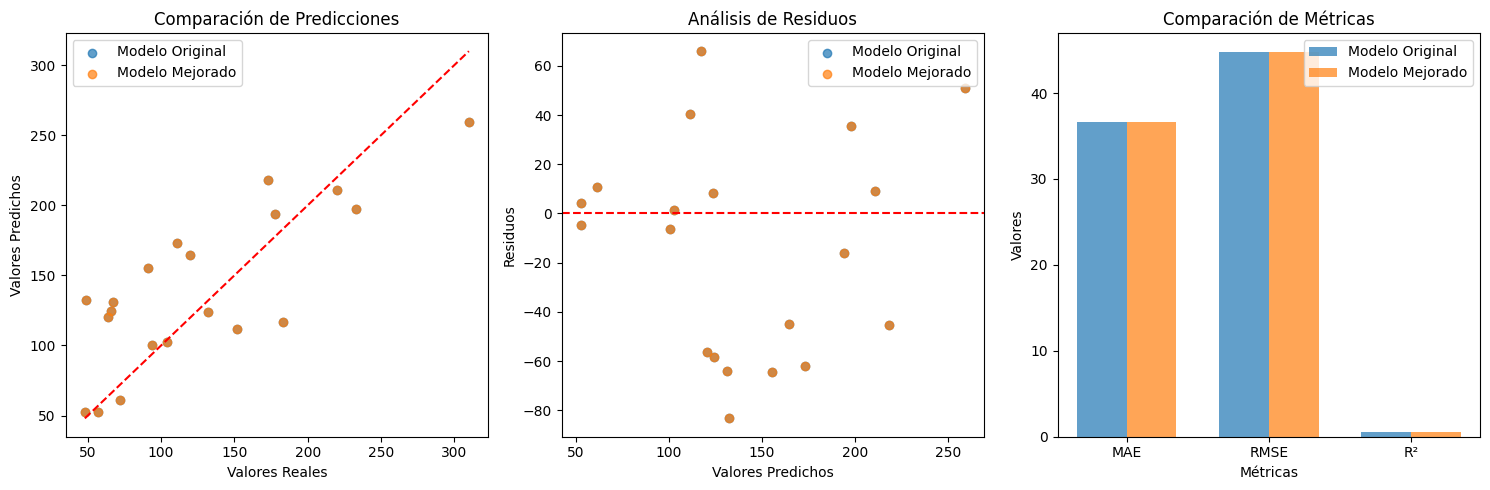

In [ ]:
# Modelo mejorado con StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Crear un pipeline con escalado y regresión lineal para mejorar el modelo
diabetes_model_improved = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Entrenar el modelo mejorado con los datos de entrenamiento
diabetes_model_improved.fit(diabetes_data_train, diabetes_target_train)

# Hacer predicciones con el modelo mejorado
# Resultado esperado: Mejoras en las métricas de error (MAE, MSE, RMSE, MAPE) y en el coeficiente R²
diabetes_predictions_improved = diabetes_model_improved.predict(diabetes_data_test)

# Calcular métricas para el modelo mejorado
# RESULTADO ESPERADO: Mejoras en las métricas de error (MAE, MSE, RMSE, MAPE) y en el coeficiente R²
# En MAE se espera una reducción, en MSE y RMSE también, en MAPE una reducción y en R² un aumento
mae_improved = mean_absolute_error(diabetes_target_test, diabetes_predictions_improved)
mse_improved = mean_squared_error(diabetes_target_test, diabetes_predictions_improved)
rmse_improved = np.sqrt(mse_improved)
r2_improved = r2_score(diabetes_target_test, diabetes_predictions_improved)

print("=== COMPARACIÓN DE MODELOS ===")
print("\nMODELO ORIGINAL:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

print("\nMODELO MEJORADO (con StandardScaler):")
print(f"MAE: {mae_improved:.2f}")
print(f"MSE: {mse_improved:.2f}")
print(f"RMSE: {rmse_improved:.2f}")
print(f"R²: {r2_improved:.3f}")

print(f"\nMejora en RMSE: {rmse - rmse_improved:.2f}")
print(f"Mejora en R²: {r2_improved - r2:.3f}")

# Visualización comparativa
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(diabetes_target_test, diabetes_predictions, alpha=0.7, label='Modelo Original')
plt.scatter(diabetes_target_test, diabetes_predictions_improved, alpha=0.7, label='Modelo Mejorado')
plt.plot([diabetes_target_test.min(), diabetes_target_test.max()], 
         [diabetes_target_test.min(), diabetes_target_test.max()], 'red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación de Predicciones')
plt.legend()

plt.subplot(1, 3, 2)
residuos_original = diabetes_target_test - diabetes_predictions
residuos_mejorado = diabetes_target_test - diabetes_predictions_improved
plt.scatter(diabetes_predictions, residuos_original, alpha=0.7, label='Modelo Original')
plt.scatter(diabetes_predictions_improved, residuos_mejorado, alpha=0.7, label='Modelo Mejorado')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.legend()

plt.subplot(1, 3, 3)
metrics_original = [mae, rmse, r2]
metrics_improved = [mae_improved, rmse_improved, r2_improved]
metric_names = ['MAE', 'RMSE', 'R²']
x = np.arange(len(metric_names))
width = 0.35

plt.bar(x - width/2, metrics_original, width, label='Modelo Original', alpha=0.7)
plt.bar(x + width/2, metrics_improved, width, label='Modelo Mejorado', alpha=0.7)
plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.title('Comparación de Métricas')
plt.xticks(x, metric_names)
plt.legend()

plt.tight_layout()
plt.show()